# Задача 1: Поиск подстроки в тексте

## Трифонов Никита Дмитриевич

trifonov28rus@gmail.com  
tg: @qwertypine

## Формулировка

Реализовать алгоритм поиска подстроки в тексте.
 
Есть английский текст, два алгоритма: линейный поиск и алгоритм Рабина-Карпа.

__Результат:__  
1. Графики зависисмости времени от размера текста при фикстированной строке поиска
2. Графики графики зависимости времени от размера строки при фиксированном тексте

## Чтение данных  
Для работы возьмем txt-файл с книгой Джорджа Оруэлла "1984", английский текст

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with open('1_Orwell_George_1984.txt', 'r') as file:
    data = file.read().replace('\n', '')

In [3]:
type(data)

str

In [4]:
N = len(data)
len(data)

558349

In [5]:
s = data[556780:556788]

In [6]:
print(s) # строка которую ищем

The rock


# Реализация алгоритмов

> По традиции шаблон поиска или образец принято обозначать как needle (англ. «иголка»), а строку, в которой ведётся поиск — как haystack (англ. «стог сена»).

In [7]:
needle = s # строка
haystack = data # подстрока которую ищем

### Линейный поиск

Простейший алгоритм поиска подстроки в строке.

In [8]:
def LinearSearch(haystack, needle):
    index = -1
    for i in range(len(haystack)-len(needle)+1):
        success = True
        for j in range(len(needle)):
            #if (needle[j]<>haystack[i+j]):
            if (needle[j]!=haystack[i+j]):
                success = False
                break
        if success:
            index = i
            break
    return index

Сложность алгоритма в худшем случае $O(nm)$, в лучшем случае — $О(m)$.

In [10]:
def LinearSearch_all(haystack, needle):
    
    result = []
    start = 0
    tmp = 0
    while True:
        start = LinearSearch(haystack[tmp:], needle)
        tmp = tmp + start
        if start == -1: 
            return result
        result.append(tmp) 
        tmp += len(needle) # use start += 1 to find overlapping matches

In [11]:
LinearSearch_all(haystack, 'The rock')

[274757, 285045, 556780]

In [12]:
"""
def find_all(a_str, sub):
    start = 0
    while True:
        start = a_str.find(sub, start)
        if start == -1: return
        yield start
        start += len(sub) # use start += 1 to find overlapping matches

list(find_all(haystack, 'The ')) # [0, 5, 10, 15]

"""

"\ndef find_all(a_str, sub):\n    start = 0\n    while True:\n        start = a_str.find(sub, start)\n        if start == -1: return\n        yield start\n        start += len(sub) # use start += 1 to find overlapping matches\n\nlist(find_all(haystack, 'The ')) # [0, 5, 10, 15]\n\n"

### Алгоритм Рабина — Карпа

_Алгоритм Рабина — Карпа_ — это алгоритм поиска строки, который ищет шаблон, то есть подстроку, в тексте, используя хеширование. Он был разработан в 1987 году Майклом Рабином и Ричардом Карпом. 

Алгоритм Рабина — Карпа пытается ускорить проверку эквивалентности образца с подстроками в тексте, используя хеш-функцию.  
_Хеш-функция_ — это функция, преобразующая каждую строку в числовое значение, называемое хеш-значением (хеш); например, мы можем иметь хеш от строки «hello» равным 5. Алгоритм использует тот факт, что если две строки одинаковы, то и их хеш-значения также одинаковы. Таким образом, всё что нам нужно, это посчитать хеш-значение искомой подстроки и затем найти подстроку с таким же хеш-значением.

Однако существуют две проблемы, связанные с этим. Первая состоит в том, что, так как существует очень много различных строк, между двумя различными строками может произойти коллизия — совпадение их хешей. В таких случаях необходимо посимвольно проверять совпадение самих подстрок, что занимает достаточно много времени, если данные подстроки имеют большую длину (эту проверку делать не нужно, если ваше приложение допускает ложные срабатывания). При использовании достаточно хороших хеш-функций (смотрите далее) коллизии случаются крайне редко, и в результате среднее время поиска оказывается невелико.

 __Образец псевдокода:__
 
 ```
 
     1 function RabinKarp(string s[1..n], string sub[1..m])
     2     hsub := hash(sub[1..m])
     3     hs := hash(s[1..m])
     4     for i from 1 to (n-m+1)
     5         if hs = hsub
     6             if s[i..i+m-1] = sub
     7                 return i
     8         hs := hash(s[i+1..i+m])
     9     return not found

```

Строки 2, 3, и 6 затрачивают для исполнения время $O(m)$ каждая. Однако строки 2 и 3 исполняются только один раз, а строка 6 выполняется только когда хеш-значения совпадают, что происходит нечасто. Строка 5 выполняется $n$ раз, но всегда требует постоянного времени.

__Используемая хеш-функция__  
Ключами к производительности алгоритма Рабина — Карпа являются низкая вероятность коллизий и эффективное вычисление хеш-значения последовательных подстрок текста. Рабин и Карп[1] предложили использовать так называемый полиномиальный хеш (хотя любой другой кольцевой хеш также подойдёт). Для данного шаблона {\displaystyle p[1..m]}{\displaystyle p[1..m]} такой хеш определён следующим образом:  
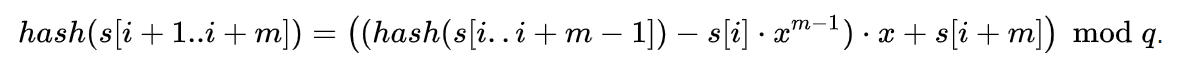  

где $q$ — некоторое простое число, а $x$ — число от $0$ до $q-1$.  

Например, пусть $x=101$, $q$ произвольно, и мы имеем текст «abracadabra» и ищем образец длины 3. Мы можем рассчитать хеш подстроки «bra» из хеша подстроки «abr» (предыдущая подстрока), вычитая число, добавленное для первой буквы 'a' из «abr», то есть $ 97 \times 101^{2}$ ($97$ — ASCII для 'a'), умножая на основание $101$ и, наконец, добавляя последнее число для «bra», то есть $ 97\times 101^{0}=97 $. Чтобы избежать переполнения целых чисел, в большинстве реализаций после каждой из этих четырёх операций (умножение при вычислении $97\times 101^{2}$ — это отдельная операция) нужно брать результат по модулю $q$.  

Современная модификация полиномиального хеша, предложенная Дитзфелбингером и др., лишена этих недостатков. Отличие этого варианта в том, что простое число $q$ фиксируется, а число $x$ случайно выбирается из диапазона от $0$ до $q-1$ перед началом работы алгоритма (при этом $x$ совсем не обязательно должно быть простым).

In [13]:
def RabinKarp(text, pattern, d, q):
    n = len(text)
    m = len(pattern)
    h = pow(d,m-1)%q
    p = 0
    t = 0
    result = []
    for i in range(m): # preprocessing (хеширование) сложность O(m)
        p = (d*p+ord(pattern[i]))%q   # ord(chr) - возвращает числовое представление для указанного символа.
        t = (d*t+ord(text[i]))%q
        
    for s in range(n-m+1): # note the +1
        if (p==t): # check character by character
            match = True
            for i in range(m):
                if pattern[i] != text[s+i]:
                    match = False
                    break
            if match:
                result = result + [s]
        if (s<n-m):
            t = (t-h*ord(text[s]))%q # remove letter s
            t = (t*d+ord(text[s+m]))%q # add letter s+m
            t = (t+q)%q # make sure that t >= 0
            
    return result

In [14]:
%timeit haystack.find(needle)

310 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [15]:
%timeit LinearSearch(haystack, needle)

113 ms ± 2.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit RabinKarp(haystack, needle,  256, 3)

342 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit RabinKarp(haystack, needle,  11, 8)

298 ms ± 9.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
"""
def TimeMeanStd(func):
    tmp = []
    for i in range(7):
        t = process_time()
        func
        elapsed_time = process_time() - t
        tmp.append(elapsed_time)
    return tmp
"""
# не работает - разобраться почему

'\ndef TimeMeanStd(func):\n    tmp = []\n    for i in range(7):\n        t = process_time()\n        func\n        elapsed_time = process_time() - t\n        tmp.append(elapsed_time)\n    return tmp\n'

In [19]:
print(len(needle))
print(len(data))
print(data.find(needle))

8
558349
274757


In [20]:
haystack_cut = np.array([1, 5, 10, 15, 20, 30, 40, 50])*10000
#needle_cut = (np.array([1, 5, 10, 20, 30, 40, 50, 70])*(len(s)/100)).astype(int)
needle_cut = np.arange(0,8)

### Фиксированная длина строки

Обрезаем текст

In [21]:
from time import process_time
from tqdm import tqdm

In [22]:
time_mean_str_ls = []
time_std_str_ls = []

for i in haystack_cut:
    haystack_cuted = haystack[i:]
    
    tmp = []
    
    for j in tqdm(range(10)): # число циклов
        t = process_time()
        
        for k in range(10):
            LinearSearch_all(haystack_cuted, needle)
            
        elapsed_time = process_time() - t
        tmp.append(elapsed_time/10)
        
    time_mean_str_ls.append(np.mean(tmp))
    time_std_str_ls.append(np.std(tmp))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.13it/s]


прогоняем, потом делим на 10

In [23]:
time_mean_str_rk = []
time_std_str_rk = []

for i in haystack_cut:
    haystack_cuted = haystack[i:]
    
    tmp = []
    
    for j in tqdm(range(10)): # число циклов
        t = process_time()
        
        for k in range(10):
            RabinKarp(haystack_cuted, needle, 11,2)
            
        elapsed_time = process_time() - t
        tmp.append(elapsed_time/10)
        
    time_mean_str_rk.append(np.mean(tmp))
    time_std_str_rk.append(np.std(tmp))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.71it/s]


In [24]:
X1 = np.array([N]*len(haystack_cut)) - haystack_cut

### Фиксированная длина текста

Обрезаем строку

In [25]:
list(LinearSearch_all(haystack, needle))

[274757, 285045, 556780]

In [26]:
time_mean_text_ls = []
time_std_text_ls = []

for i in needle_cut:
    needle_cuted = needle[i:]
    
    tmp = []
    
    for j in tqdm(range(10)): # число циклов
        t = process_time()
        
        for k in range(10):
            LinearSearch_all(haystack, needle_cuted)
        
        elapsed_time = process_time() - t
        tmp.append(elapsed_time/10)
        
    time_mean_text_ls.append(np.mean(tmp))
    time_std_text_ls.append(np.std(tmp))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.82s/it]


In [27]:
time_mean_text_rk = []
time_std_text_rk = []

for i in needle_cut:
    needle_cuted = needle[i:]
    
    tmp = []
    
    for j in tqdm(range(10)): # число циклов
        t = process_time()
        
        for k in range(10):
            RabinKarp(haystack, needle_cuted, 11, 2)
            
        elapsed_time = process_time() - t
        tmp.append(elapsed_time/10)
        
    time_mean_text_rk.append(np.mean(tmp))
    time_std_text_rk.append(np.std(tmp))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:38<00:00,  3.88s/it]


In [28]:
X2 = np.array([len(needle)]*len(needle_cut)) - needle_cut

# Итоги

Text(0.5, 1.0, 'const needle')

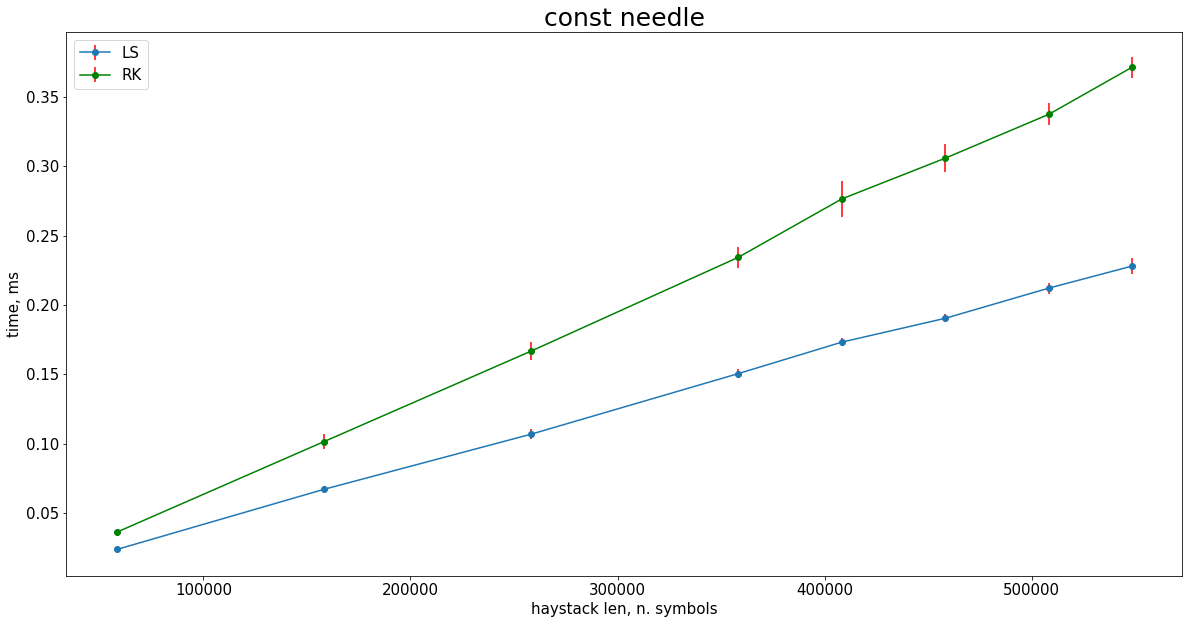

In [29]:
# фиксированная подстрока
plt.figure(figsize=(20,10))
plt.errorbar(X1, time_mean_str_ls, yerr=time_std_str_ls, fmt='o-', ecolor='red', label='LS')
plt.errorbar(X1, time_mean_str_rk, yerr=time_std_str_rk, fmt='o-', color='green', ecolor='red', label='RK')
plt.legend(loc='upper left', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('time, ms', fontsize=15)
plt.xlabel('haystack len, n. symbols', fontsize=15)
plt.title('const needle', fontsize=25)

Text(0.5, 1.0, 'Const haystack')

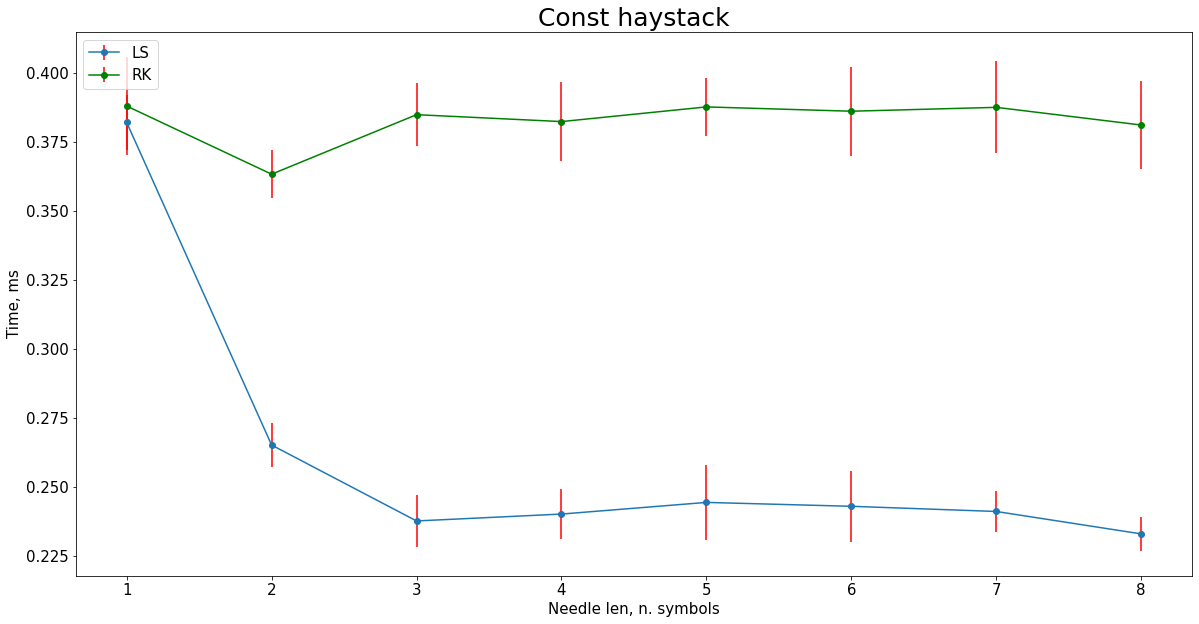

In [30]:
# фиксированный текст
plt.figure(figsize=(20,10))
plt.errorbar(X2, time_mean_text_ls, yerr=time_std_text_ls, fmt='o-', ecolor='red', label='LS')
plt.errorbar(X2, time_mean_text_rk, yerr=time_std_text_rk, fmt='o-', color='green', ecolor='red', label='RK')
plt.legend(loc='upper left', fontsize=15)
plt.xticks(X2, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Time, ms', fontsize=15)
plt.xlabel('Needle len, n. symbols', fontsize=15)
plt.title('Const haystack', fontsize=25)

## Вывод
В среднем, для текстов метод Рабина-Карпа не даёт выигрыша, кроме того, даже
может оказаться, что грубая сила (первый метод) лучше. В случае с нуклеиновыми кислотами
этот метод оказывается выигрышнее. При большом алфавите метод грубой силы оказывается
лучше, так как очень маловероятно сравнивать далее, чем 2 символа. Поэтому Рабин-Карп
лучше для малых алфавитов.

РК с простейшим суммированием 

__4 задача:__  

QuickSort сравнить рекурсивный с нерекурсивным по времени  

! Выбор первой ветки рекурсии (1я более короткая)  